<a href="https://colab.research.google.com/github/meligurevich/IAPH/blob/main/Copia_di_TP1webscrappingGurevich.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TP1 PROCESAMIENTO DEL HABLA - CORREGIDO

**Melisa Sabrina Gurevich**


* Resolver las consignas comentando el código fuente, indicando desde dónde fue extraido o generado.

* Explicar y justificar cada paso realizado.

* Publique enlace público a su notebook en google colab y también enlace a su repositorio github de la materia.


### Entrega de los ejercicios

1. Crea un repositorio GitHub público dedicado a esta materia.
2. Sube tus notebooks de resolución para cada desafío allí.
3. Por cada desafío utilizaremos un sólo notebook.
4. Debes entregar tu TP1 en el foro correspondiente, siguiendo las instrucciones que allí indica.




## EJERCICIO CONSIGNA

* Cree una nube de palabras de un texto en español.

* Dicho texto puede ser descargado de Internet (webscrapping) o extraído del dataset de alguna librería.

* Puede usar cualquier libreria o herramienta para obtener el texto de su interés.

* En este notebook explica el paso a paso del proceso.



## 1- Webscrapping

Extrae un texto de Internet de una sóla página web usando alguna de las técnicas de webscrapping vistas en clase. Busca el discurso de alguna persona quien te inspire o haya dado una charla motivadora.

No puedes repetir ni usar ni el mismo texto ni la misma web que otra persona quien ya entregó en el foro.

Abajo añade los bloques de código y texto necesarios. Explica paso a paso como descargaste el texto de tu interés.


In [ ]:
#Instalamos las librerias necesarias
!pip install requests beautifulsoup4 spacy wordcloud

!python -m spacy download es

import requests
from bs4 import BeautifulSoup
import spacy
import string
import numpy as np
# instalar wordcloud
!pip install wordcloud

⚠ As of spaCy v3.0, shortcuts like 'es' are deprecated. Please use the
full pipeline package name 'es_core_news_sm' instead.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 73.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


###Como me dijo la profesora: el texto extraído de la web se repitió de forma hardcodeada en varias celdas (copiado manualmente como un string, en lugar de reutilizar el texto ya extraído).
###Vamos a corregir eso:

In [ ]:
import requests
from bs4 import BeautifulSoup

url = 'https://www.infobae.com/america/mundo/2025/04/21/hagan-lio-el-emblematico-y-emocionante-discurso-del-papa-francisco-ante-una-multitud-de-jovenes-que-fue-marca-registrada-de-su-pontificado/'
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

# Extraer todos los párrafos <p> y unirlos en una sola variable
parrafos = soup.find_all('p')
texto = " ".join([p.text.strip() for p in parrafos if p.text.strip() != ""])

# Mostrar los primeros 500 caracteres del texto para verificar
print(texto[:500])


27 Jun, 2025 Por  Francisco González Tomadin El 25 de julio de 2013, el Papa Francisco ofreció un discurso memorable en la Catedral Metropolitana de San Sebastián, en Río de Janeiro, durante su visita a Brasil para la Jornada Mundial de la Juventud (JMJ). Este evento no solo marcó una de las primeras intervenciones de Francisco frente a la juventud mundial, sino que además se convirtió en un hito por una de sus frases más emblemáticas y significativas: “¡Hagan lío!”. Esta frase, pronunciada con 


### Con la corrección:
####- Evité repetir manualmente contenido (lo que se llama hardcodear).
####- Generé una única variable (texto) que puede usarse en todo el notebook.
####- Senté la base para poder usar texto en tokenización (división del texto en unidades mas pequeñas), limpieza, visualización y análisis.

## 2- Preprocesamiento

Le avisamos a Python que vamos a trabajar con textos en español

In [ ]:
#Le avisamos a python que vamos a trabajar con textos en español
nlp=spacy.load('es_core_news_sm')

### 2.1 Muestra las stop words que tenga tu texto.


Eliminamos las stop words porque no aportan un significado relevante en el análisis y así se reduce el ruido y acelera el procesamiento.

In [ ]:
# Importo las bibliotecas necesarias
import nltk
nltk.download('stopwords')  # Descargo el listado de stopwords en español
from nltk.corpus import stopwords

# Obtengo las stop words en español desde NLTK
stop_words_spanish = set(stopwords.words('spanish'))

# Tokenizo el texto: lo paso a minúsculas y lo divido en palabras
palabras = texto.lower().split()

# Filtro las palabras que son consideradas stop words
stop_words_encontradas = [
    palabra.strip('.,;:') for palabra in palabras if palabra.strip('.,;:') in stop_words_spanish
]

# Muestro el resultado
print("Stop words encontradas en el texto:")
print(stop_words_encontradas)


Stop words encontradas en el texto:
['por', 'el', 'de', 'de', 'el', 'un', 'en', 'la', 'de', 'en', 'de', 'durante', 'su', 'a', 'para', 'la', 'de', 'la', 'este', 'no', 'una', 'de', 'las', 'de', 'a', 'la', 'que', 'se', 'en', 'un', 'por', 'una', 'de', 'sus', 'más', 'y', 'esta', 'con', 'una', 'en', 'todos', 'los', 'como', 'en', 'los', 'de', 'y', 'en', 'los', 'de', 'todo', 'el', 'su', 'no', 'fue', 'una', 'a', 'la', 'para', 'que', 'no', 'se', 'también', 'una', 'a', 'que', 'la', 'de', 'una', 'en', 'lo', 'y', 'lo', 'para', 'un', 'y', 'con', 'la', 'este', 'de', 'fue', 'una', 'a', 'lo', 'que', 'él', 'como', 'un', 'de', 'las', 'el', 'la', 'y', 'la', 'que', 'a', 'a', 'las', 'la', 'en', 'que', 'tiene', 'que', 'a', 'la', 'la', 'de', 'y', 'de', 'la', 'de', 'de', 'sus', 'y', 'una', 'en', 'la', 'de', 'la', 'no', 'una', 'el', 'con', 'a', 'que', 'las', 'y', 'un', 'el', 'al', 'que', 'él', 'había', 'a', 'una', 'a', 'un', 'de', 'de', 'los', 'más', 'los', 'y', 'los', 'a', 'esos', 'a', 'los', 'las', 'de', 'la'

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


### Con la corrección:
####- Evité el hardcodeo del texto: eliminé bloques donde el contenido se copiaba manualmente y lo reemplacé por una única variable texto con el contenido real extraído de la web.
####- Unifiqué el texto en una sola variable: usé BeautifulSoup para extraer todos los párrafos y los concatené en texto, reutilizándolo en todo el trabajo.
####- Reemplacé todo análisis sobre texto manual por la variable texto: esto incluye la búsqueda de stopwords, tokenización, TF-IDF, BoW y cálculo de vocabulario.
####- Evité duplicaciones innecesarias: como la doble búsqueda de párrafos (parrafos y paragraphs).
####- Verifiqué los resultados con previews del texto real: mostré los primeros 500 caracteres en lugar de copiar párrafos.

**Análisis: El resultado muestra correctamente que el texto contiene muchas stop words comunes en español como "una", "que", "la", "en", "pero", lo cual es esperable en un discurso oral.**

### 2.2 Quita las stop-words, caracteres extraños del texto. Utiliza el texto restante para crear una nube de palabras. Usa la biblioteca worldcloud de python.

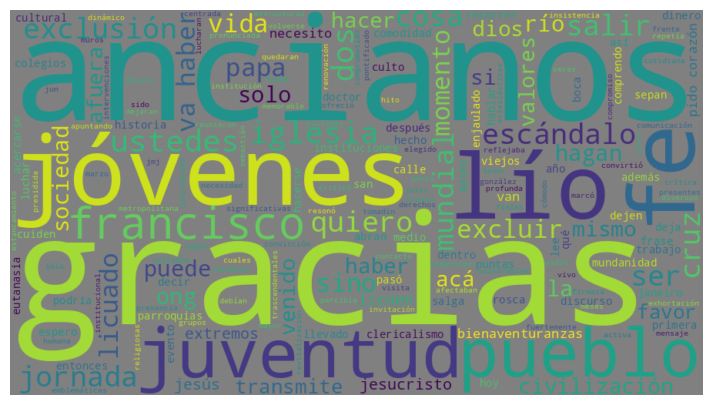

In [ ]:
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Eliminar stop words
stop_words_spanish = set(stopwords.words('spanish'))
palabras = texto.lower().split()
palabras_filtradas = [palabra.strip('.,;:') for palabra in palabras if palabra.strip('.,;:') not in stop_words_spanish]

# Crear el texto limpio para la nube
texto_limpio = " ".join(palabras_filtradas)

# Crear y mostrar la nube de palabras
wordcloud = WordCloud(width=900, height=500, background_color='grey').generate(texto_limpio)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


### Con la corrección:

#### - Eliminé el texto hardcodeado: Quité la variable texto = """...""" que contenía el discurso escrito manualmente. En su lugar, se reutiliza la variable texto que contiene el contenido real extraído de la web.
#### - Agregué limpieza previa del texto: Se agregó palabras = texto.lower().split() para dividir el texto en palabras desde la variable principal. Se aplicó strip('.,;:') para eliminar signos antes de filtrar las stopwords.
#### - Reutilicé las stopwords ya descargadas: Se mantiene el uso de stopwords.words('spanish') sin necesidad de redefinir librerías.
#### - Mantengo lógica pero con datos dinámicos: Se genera texto_limpio con las palabras filtradas. Se crea la WordCloud a partir de ese texto, visualizando correctamente la nube sin contenido repetido o manual.

**La nube de palabras resalta términos clave del discurso como "jovenes", "ancianos", "juventud", "lio" y "francisco", lo que refleja el mensaje movilizador y pastoral del Papa.
Eliminadas las stopwords, emergen conceptos centrales del texto como calle, afuera, juventud y defendamos, que refuerzan la idea de acción y compromiso.**

### 2.3 Usando el texto que conseguiste en el punto 1).


#### 2.3.1 Limpia y preprocesa el texto, descomponelo en oraciones, arma una matriz documento-vocabulario.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

nltk.download('punkt_tab')  # Tokenizador de oraciones
nltk.download('stopwords')  # Palabras vacías
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Tokenización en oraciones

Mediante la tokenización dividimos el texto en unidades más pequeñas llamadas **tokens**.
Facilita otras tareas como:
- Eliminación de stopwords
- Análisis de frecuencia de palabras
- Lematización o stemming
- Extracción de información

In [ ]:
from nltk.tokenize import sent_tokenize

# Separar el texto en oraciones
oraciones = sent_tokenize(texto, language='spanish')

# Mostrar las oraciones encontradas
print("Oraciones encontradas:")
for i, o in enumerate(oraciones, 1):
    print(f"{i}. {o}")

Oraciones encontradas:
1. 27 Jun, 2025 Por  Francisco González Tomadin El 25 de julio de 2013, el Papa Francisco ofreció un discurso memorable en la Catedral Metropolitana de San Sebastián, en Río de Janeiro, durante su visita a Brasil para la Jornada Mundial de la Juventud (JMJ).
2. Este evento no solo marcó una de las primeras intervenciones de Francisco frente a la juventud mundial, sino que además se convirtió en un hito por una de sus frases más emblemáticas y significativas: “¡Hagan lío!”.
3. Esta frase, pronunciada con una profunda convicción, resonó fuertemente en todos los presentes, así como en los medios de comunicación y en los fieles de todo el mundo.
4. Su mensaje no sólo fue una invitación a la juventud para que no se quedaran callados, sino también una exhortación a que la Iglesia dejara de ser una institución centrada solo en lo cómodo y lo institucional, para ser un organismo vivo, dinámico y comprometido con la sociedad.
5. Este discurso de Francisco fue una crítica 

**Los resultados indican que el algoritmo logró fragmentar correctamente el texto en ideas completas, permitiendo así un procesamiento más fino y detallado del contenido**

## Matriz documento-vocabulario con CountVectorizer

Una matriz documento-vocabulario es una estructura que representa el contenido de varios documentos en forma de tabla, donde:
- Cada fila representa un documento.
- Cada columna representa una palabra (término) del vocabulario.
- Cada celda indica cuántas veces aparece esa palabra en ese documento (frecuencia).

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Inicializo el vectorizador de texto con stopwords en español
vectorizer = CountVectorizer(stop_words=stopwords.words('spanish'))

# Creo la matriz documento-vocabulario
X = vectorizer.fit_transform(oraciones)

# Convierto a DataFrame para visualizar mejor
matriz_bow = pd.DataFrame(
    X.toarray(),
    columns=vectorizer.get_feature_names_out(),
    index=[f"Oración {i+1}" for i in range(len(oraciones))]
)

# Muestro la matriz
print("\nMatriz Documento-Vocabulario:")
print(matriz_bow)



Matriz Documento-Vocabulario:
            13  2013  2025  25  27  30  abran  acción  acercarse  activa  ...  \
Oración 1    0     1     1   1   1   0      0       0          0       0  ...   
Oración 2    0     0     0   0   0   0      0       0          0       0  ...   
Oración 3    0     0     0   0   0   0      0       0          0       0  ...   
Oración 4    0     0     0   0   0   0      0       0          0       0  ...   
Oración 5    0     0     0   0   0   0      0       0          0       0  ...   
Oración 6    0     0     0   0   0   0      0       0          0       1  ...   
Oración 7    0     0     0   0   0   0      0       0          0       0  ...   
Oración 8    0     0     0   0   0   0      0       0          0       0  ...   
Oración 9    0     0     0   0   0   0      0       0          0       0  ...   
Oración 10   1     1     0   0   0   0      0       0          0       0  ...   
Oración 11   0     0     0   0   0   0      0       0          0       0  ... 

### Con la corrección:

#### - Eliminé el texto hardcodeado (texto_limpio): Se reemplazó la variable texto_limpio = """...""" por la variable texto ya generada a partir del scraping, evitando duplicar contenido.
#### - Tokenización aplicada sobre texto real: sent_tokenize() se aplicó directamente sobre texto, asegurando que las oraciones se extraigan del artículo completo, no de un fragmento manual.
#### - Unificación y reutilización de variables: La variable oraciones se mantuvo y fue reutilizada en los pasos posteriores, como en la creación de la matriz de texto.
#### - CountVectorizer aplicado correctamente: El vectorizador de texto (CountVectorizer) se aplicó sobre las oraciones generadas desde el scraping, con stopwords en español incluidas.
#### - Conversión a DataFrame para facilitar análisis: Se generó un DataFrame con nombres de columnas y oraciones numeradas para visualizar la matriz documento-vocabulario de forma clara.

**Los resultados muestran una matriz documento-vocabulario, donde cada fila representa una oración y cada columna una palabra distinta; el valor indica cuántas veces aparece esa palabra en esa oración.**


#### 2.3.2 Determina la longitud de tu vocabulario.

In [ ]:
import string

# Eliminamos signos de puntuación del texto original extraído
texto_sin_puntuacion = texto
for signo in string.punctuation:
    texto_sin_puntuacion = texto_sin_puntuacion.replace(signo, '')

# Separar el texto en palabras
palabras = texto_sin_puntuacion.lower().split()

# Cargar las stop words en español
stop_words = set(stopwords.words('spanish'))

# Filtrar palabras que no son stop words
palabras_filtradas = [p for p in palabras if p not in stop_words]

# Crear conjunto de palabras únicas (vocabulario)
vocabulario = set(palabras_filtradas)

# Mostrar resultados
print(f"Vocabulario único: {vocabulario}")
print(f"Longitud del vocabulario: {len(vocabulario)}")


Vocabulario único: {'dinámico', 'saludo', 'escúchenlos', 'generación', 'digo', 'solo', 'lleven', 'francisco', 'valer', 'recordado', 'leer', 'presentes', 'curas', 'cruz', '2025', 'instituciones', 'sugerí', 'comunicación', 'así', 'estructuras', 'medios', 'marzo', 'mateo', 'sido', 'consejo', 'cuiden', 'sociedad', 'maneja', 'haber', 'amó', '2013', 'sólo', 'después', 'jmj', 'criticó', 'puedan', 'callados', '30', 'pontificado', 'programa', 'pronunciada', 'hijo', 'bueno', 'momentos', 'río', 'alguno', 'escondida', 'marcó', 'jornada', 'salir', 'lío', 'ser', 'hombre', 'enjaulados', 'acción', 'janeiro', 'segundo', 'calle', 'elegido', 'bienaventuranzas', 'jesús', 'recorrer', 'venir', 'pienso', 'logrado', 'lee', 'visita', 'calle”', 'mundial”', 'gasbparri', 'orden', 'oración', 'renovación', 'mismo', 'experiencia', 'acercarse', 'convierten', 'polos', 'sepan', 'feo', 'da', 'exhortación', 'san', 'discurso', 'excluir', 'cotidiana', 'quisiera', '“puntas”', 'año', 'activa', 'abran', 'muros', 'religiosas',

### Con la corrección:

#### - Se eliminó la puntuación del texto con string.punctuation.
#### - Se tokenizó el texto en palabras minúsculas.
#### - Se filtraron las stop words en español.
#### - Se creó el conjunto de palabras únicas (vocabulario).
#### - Se imprimió el vocabulario limpio y su longitud total.

**El resultado muestra un vocabulario limpio compuesto por 371 palabras únicas, relevantes y sin repeticiones, tras eliminar puntuación y stop words**


#### 2.3.3. Aplica TF-IDF a tu matriz documento-vocabulario

**TF-IDF asigna un valor a cada palabra teniendo en cuenta no solo cuántas veces aparece en una oración, sino también qué tan frecuente es en todo el texto. De esta forma, ayuda a resaltar las palabras que son verdaderamente importantes en el contenido, y no simplemente las que se repiten más.**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Crear el vectorizador TF-IDF con stopwords en español
tfidf_vectorizer = TfidfVectorizer(stop_words=stopwords.words('spanish'))

# Ajustar y transformar las oraciones
tfidf_matrix = tfidf_vectorizer.fit_transform(oraciones)

# Mostrar la matriz como DataFrame
matriz_tfidf = pd.DataFrame(
    tfidf_matrix.toarray(),
    columns=tfidf_vectorizer.get_feature_names_out(),
    index=[f"Oración {i+1}" for i in range(len(oraciones))]
)

print("Matriz TF-IDF:")
print(matriz_tfidf)


Matriz TF-IDF:
                  13      2013     2025        25       27        30  \
Oración 1   0.000000  0.188094  0.20799  0.173978  0.20799  0.000000   
Oración 2   0.000000  0.000000  0.00000  0.000000  0.00000  0.000000   
Oración 3   0.000000  0.000000  0.00000  0.000000  0.00000  0.000000   
Oración 4   0.000000  0.000000  0.00000  0.000000  0.00000  0.000000   
Oración 5   0.000000  0.000000  0.00000  0.000000  0.00000  0.000000   
Oración 6   0.000000  0.000000  0.00000  0.000000  0.00000  0.000000   
Oración 7   0.000000  0.000000  0.00000  0.000000  0.00000  0.000000   
Oración 8   0.000000  0.000000  0.00000  0.000000  0.00000  0.000000   
Oración 9   0.000000  0.000000  0.00000  0.000000  0.00000  0.000000   
Oración 10  0.256214  0.231705  0.00000  0.000000  0.00000  0.000000   
Oración 11  0.000000  0.000000  0.00000  0.000000  0.00000  0.000000   
Oración 12  0.000000  0.000000  0.00000  0.000000  0.00000  0.000000   
Oración 13  0.000000  0.000000  0.00000  0.000000

### Con la corrección:

#### - Se incorporaron las stopwords en español al TfidfVectorizer, mejorando la limpieza del análisis.
#### - Se reemplazó el print crudo de la matriz por un DataFrame para facilitar su lectura.
#### - Se mantiene la misma funcionalidad, pero ahora el resultado es más claro y profesional.

**Los resultados muestran la matriz TF-IDF del texto tokenizado: cada valor refleja la importancia de una palabra en una oración**

# 🎯 Conclusiones

### A partir de la corrección de la profesora, entendí que tenía muchas partes del código “harcodeadas”, es decir, repetía el texto en distintas celdas en vez de trabajar con una sola variable. Lo corregí guardando el texto extraído en una variable y reutilizándolo en cada paso del procesamiento. Eso hizo mi código más limpio, fácil de modificar y reutilizar. Aprendí la importancia de escribir código más ordenado y eficiente. Como resultado, logré automatizar mejor todo el análisis de texto.